defining a function for random initialisation of cluster centres

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
def init(k,data):
    cen=[]
    for i in range(k):
        j=np.random.choice(range(0,data.shape[0]))
        x,y=data[j,:]
        if (x,y) not in cen:
            cen.append((x,y))
    return cen



defining the loss

In [ ]:
def los(x,y):
    result=(x[0]-y[0])**2+(x[1]-y[1])**2
    return result

defining the method for cluster assignment

In [ ]:
def clustering(data,cen):
    clus=[]
    for (x,y) in data:
        distance=[]
        for (m,n) in cen:
            distance.append(los((x,y),(m,n)))
        clus.append(np.argmin(distance))
    return clus


defining the loss function

In [ ]:
def lossfunction(data,cen,clus,k):
    clus=np.array(clus)
    loss=0
    for i in range(k):
        currdata=data[clus==i]
        for j in range(currdata.shape[0]):
            loss=loss+los(cen[i],currdata[j])
    return loss

updating the centroid

In [ ]:
def centroidchange(data,clus,k):
    clus=np.array(clus)
    cen=[]
    for i in range(k):
        x=data[clus==i][:,0]
        y=data[clus==i][:,1]
        cen.append((np.average(x),np.average(y)))
    return cen

a function to check weather a point jumped from one cluster to another

In [ ]:
def check(clus,previousclus):
    if clus==previousclus:
        return True
    else:
        return False

putting all things together

In [ ]:
def kmeans(data,k):
    loss_=[]
    cen=init(k,data)
    previousclus=np.zeros(data.shape[0])
    previousclus=list(previousclus)
    while True:
        clus=clustering(data,cen)
        loss_.append(lossfunction(data,cen,clus,k))
        cen=centroidchange(data,clus,k)
        checker=check(clus,previousclus)
        previousclus=clus
        if checker==True:
            break
    return clus,cen,loss_,

importing data file

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving cm_dataset_2 (1).csv to cm_dataset_2 (1).csv


In [ ]:
data=pd.read_csv("cm_dataset_2 (1).csv")
data=np.array(data)
data.shape

(999, 2)

k-means with 2 clusters

<class 'numpy.ndarray'>


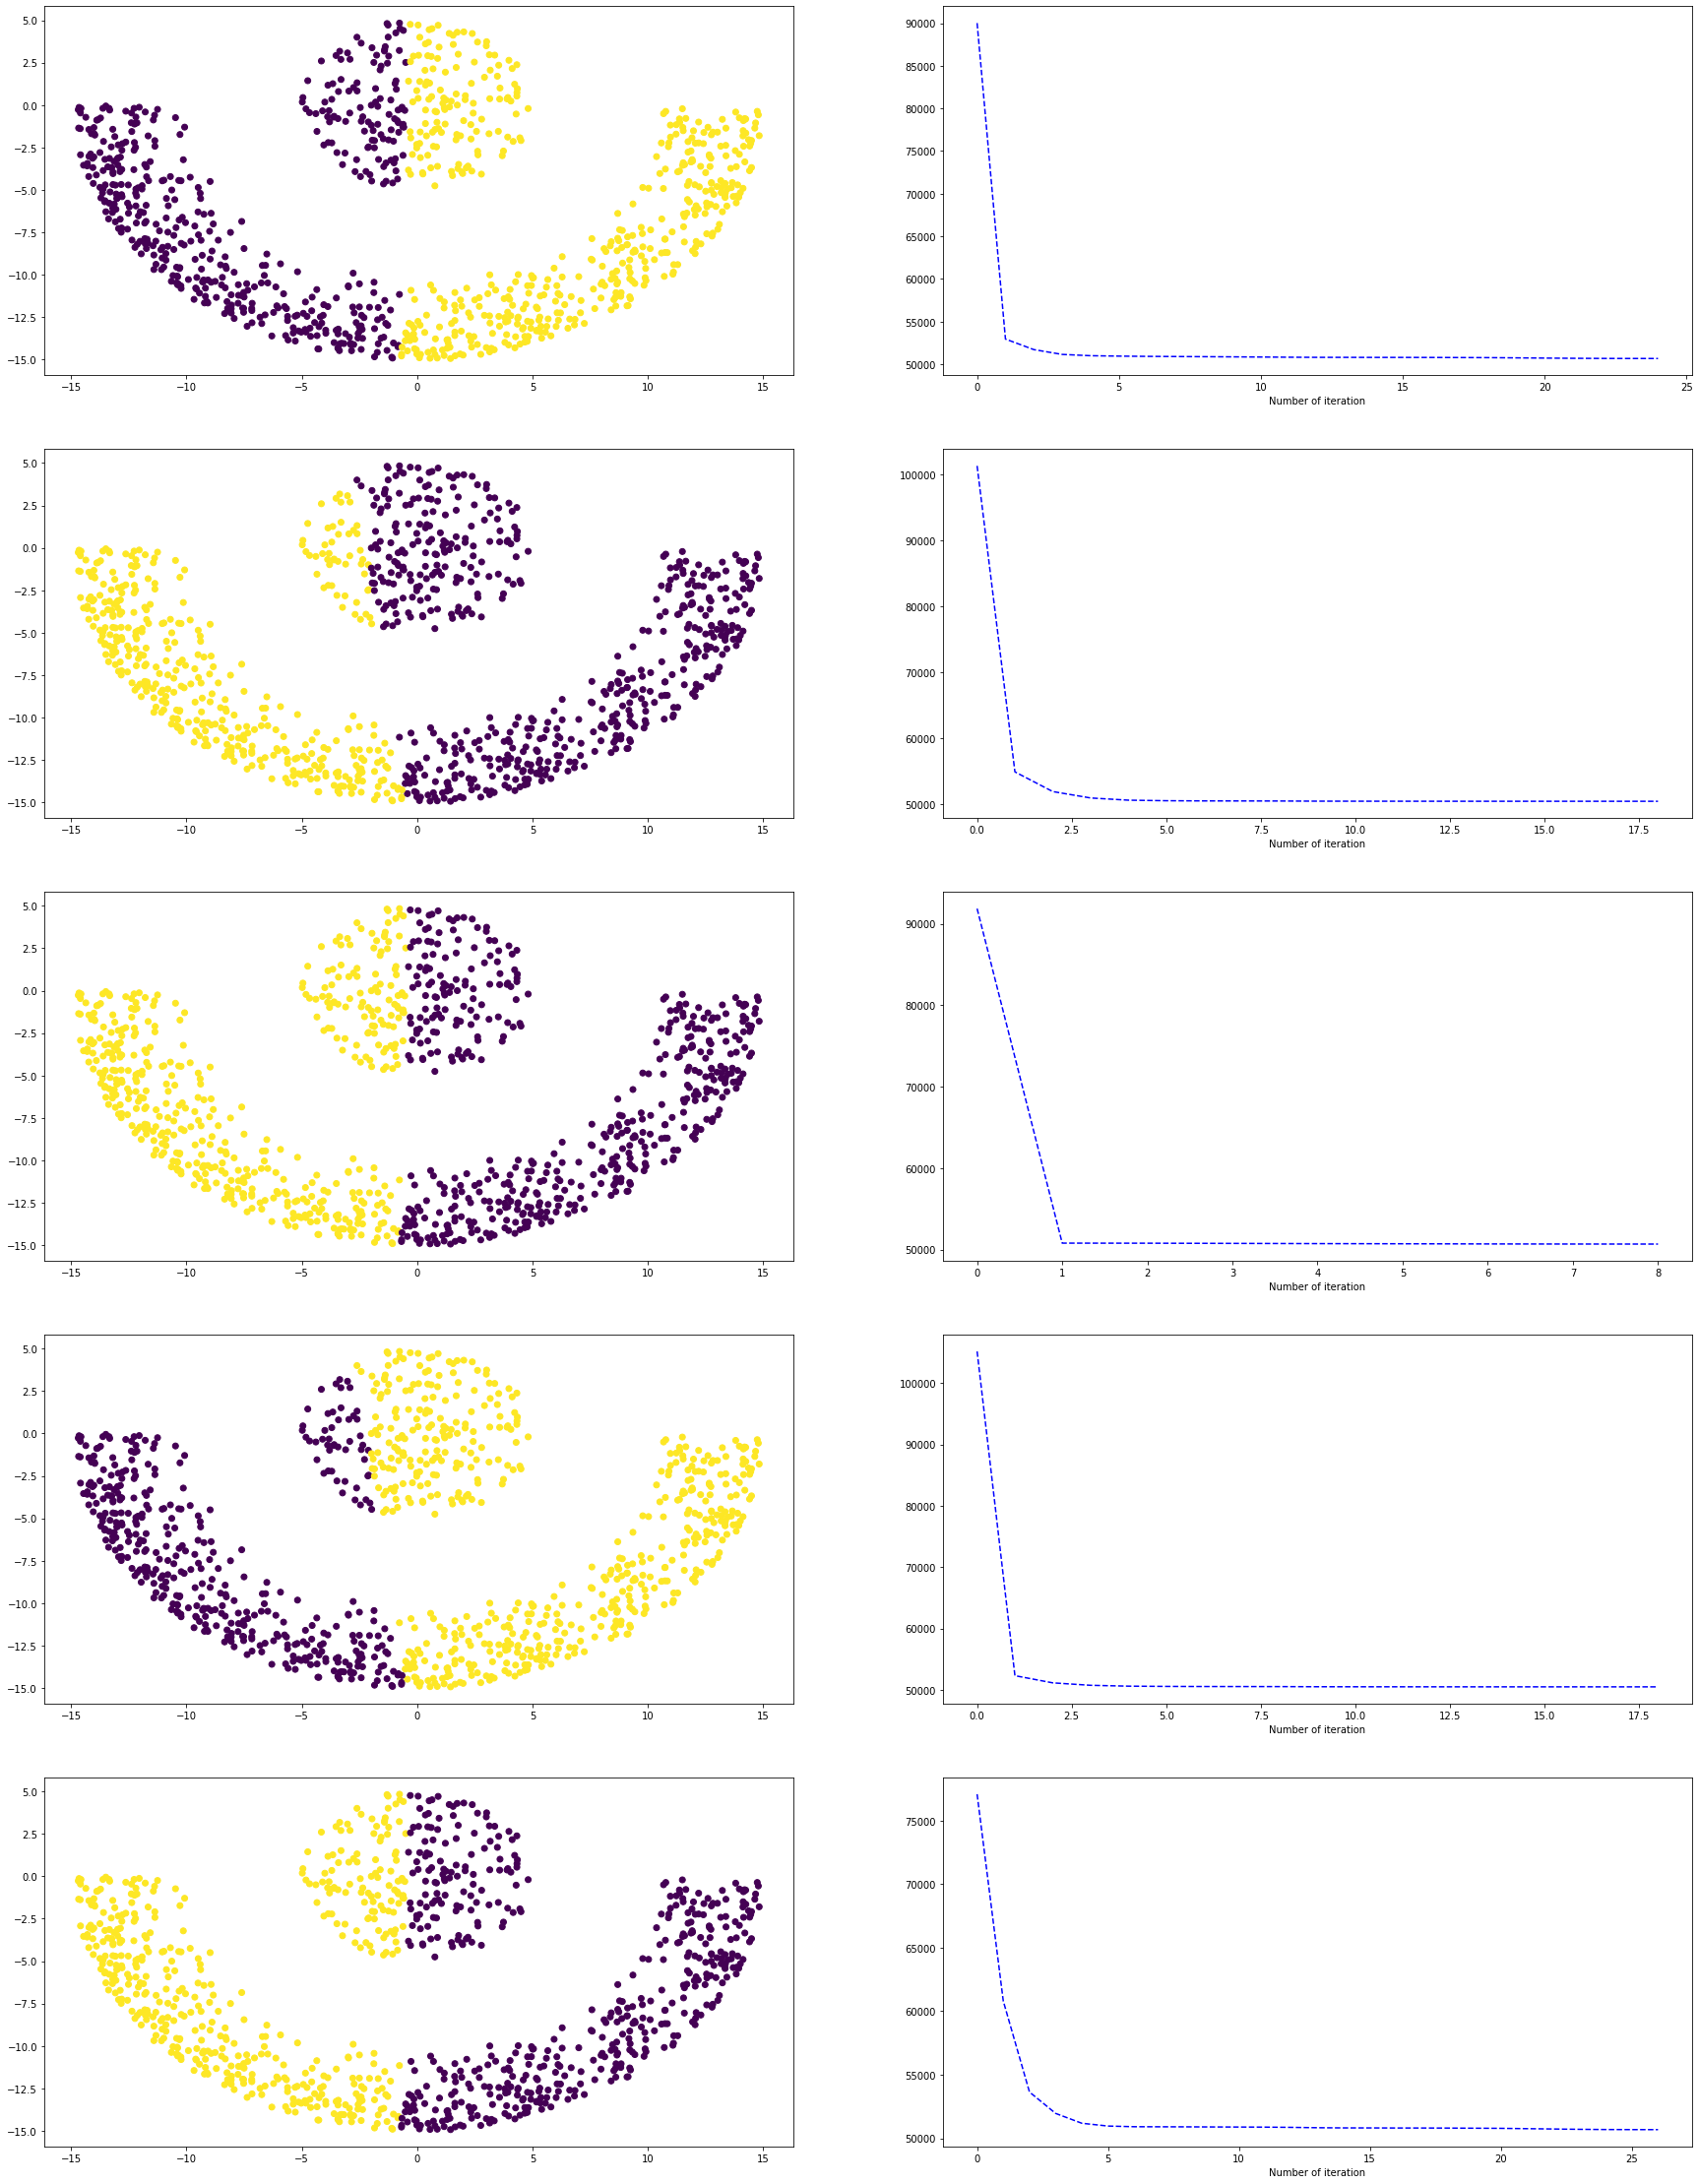

In [ ]:
k=2
fig,axs=plt.subplots(5,2,figsize=(30,40))
print(type(axs))
i=0
j=0
while j<5:
    cluster,centroids,loss=kmeans(data,k)
    axs[i,0].scatter(data[:,0],data[:,1],c=cluster)
    axs[i,1].plot(loss,'b--')
    axs[i,1].set_xlabel('Number of iteration')
    i=i+1
    j=j+1

so we see with different random initialisation the error reduces at different iterations and saturates.but one thing to notice that in all the cases the error saturates which is indicative of the fact that kmeans converges

defining the voronoi region

In [ ]:
def VoronoiRegion(cen):
    x=np.arange(-100,100,1.0)
    y=np.arange(-100,100,1.0)
    m,n=np.meshgrid(x,y)
    color=np.zeros_like(m)
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            pt=np.array([m[i,j],n[i,j]])
            dist=[]
            for x1,y1 in cen:
                dist.append(los(pt,(x1,y1)))
            color[i,j]=np.argmin(dist)
    return color,m,n


plotting the voronoi region with different clusters

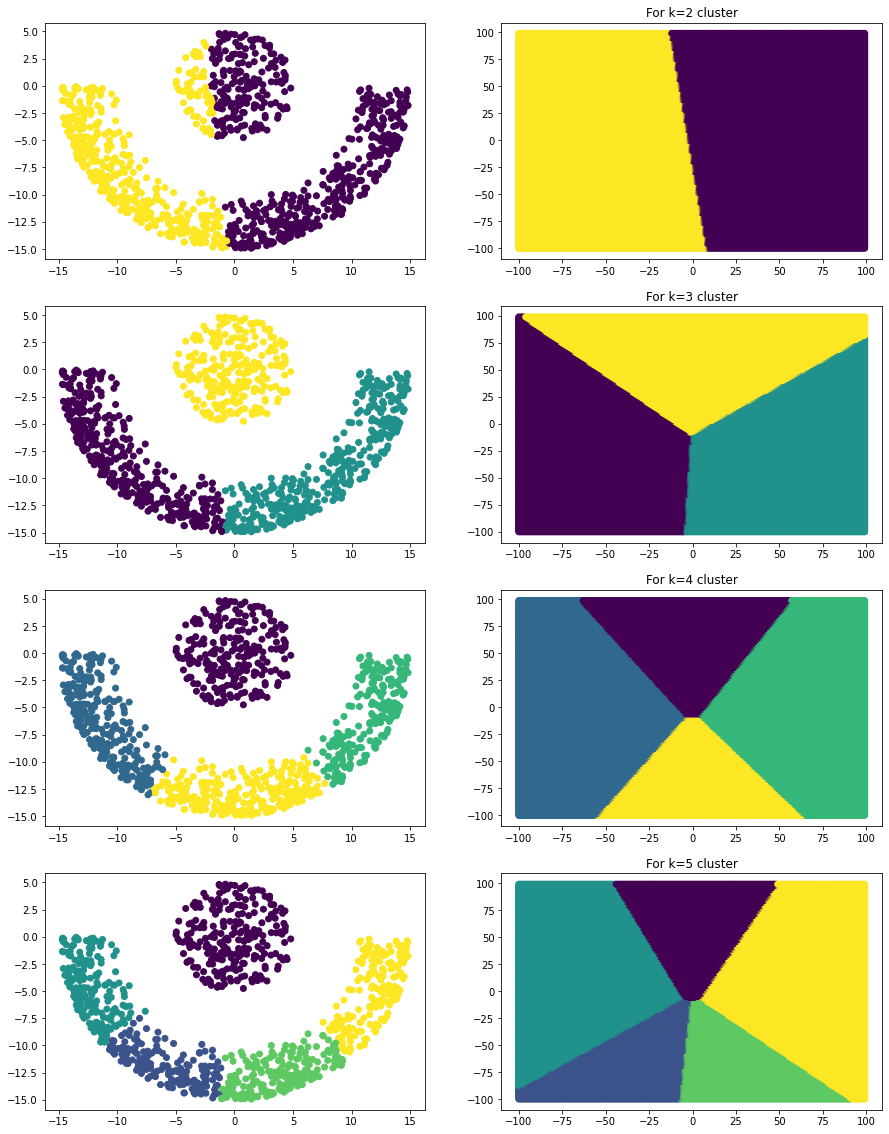

In [ ]:
fig,axs=plt.subplots(4,2,figsize=(15,20))
num=1
k=[2,3,4,5]
j=0
for i in range(4):
    cluster,centroid,loss=kmeans(data,k[i])
    axs[j,0].scatter(data[:,0],data[:,1],c=cluster)
    color,x_,y_=VoronoiRegion(centroid)
    axs[j,1].scatter(x_,y_,c=color)
    axs[j,1].set_title(f'For k={k[i]} cluster')
    j=j+1

we see that as expected the voronoi region is created as a result of linear seperation boundaries

defining the gaussian kernel and centering the new dataset

In [ ]:
def gaussiankernel(X,sigma):
    X=X.T
    X=np.array(X)
    D=np.sum(X**2,axis=1,keepdims=True)+np.sum(X**2,axis=1)-2*np.dot(X,X.T)
    k=np.exp(-D/(2*(sigma**2)))
    return k

def centering(K):
    N,N=K.shape
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    return K

clustering using gaussian kernel with different standard deviation

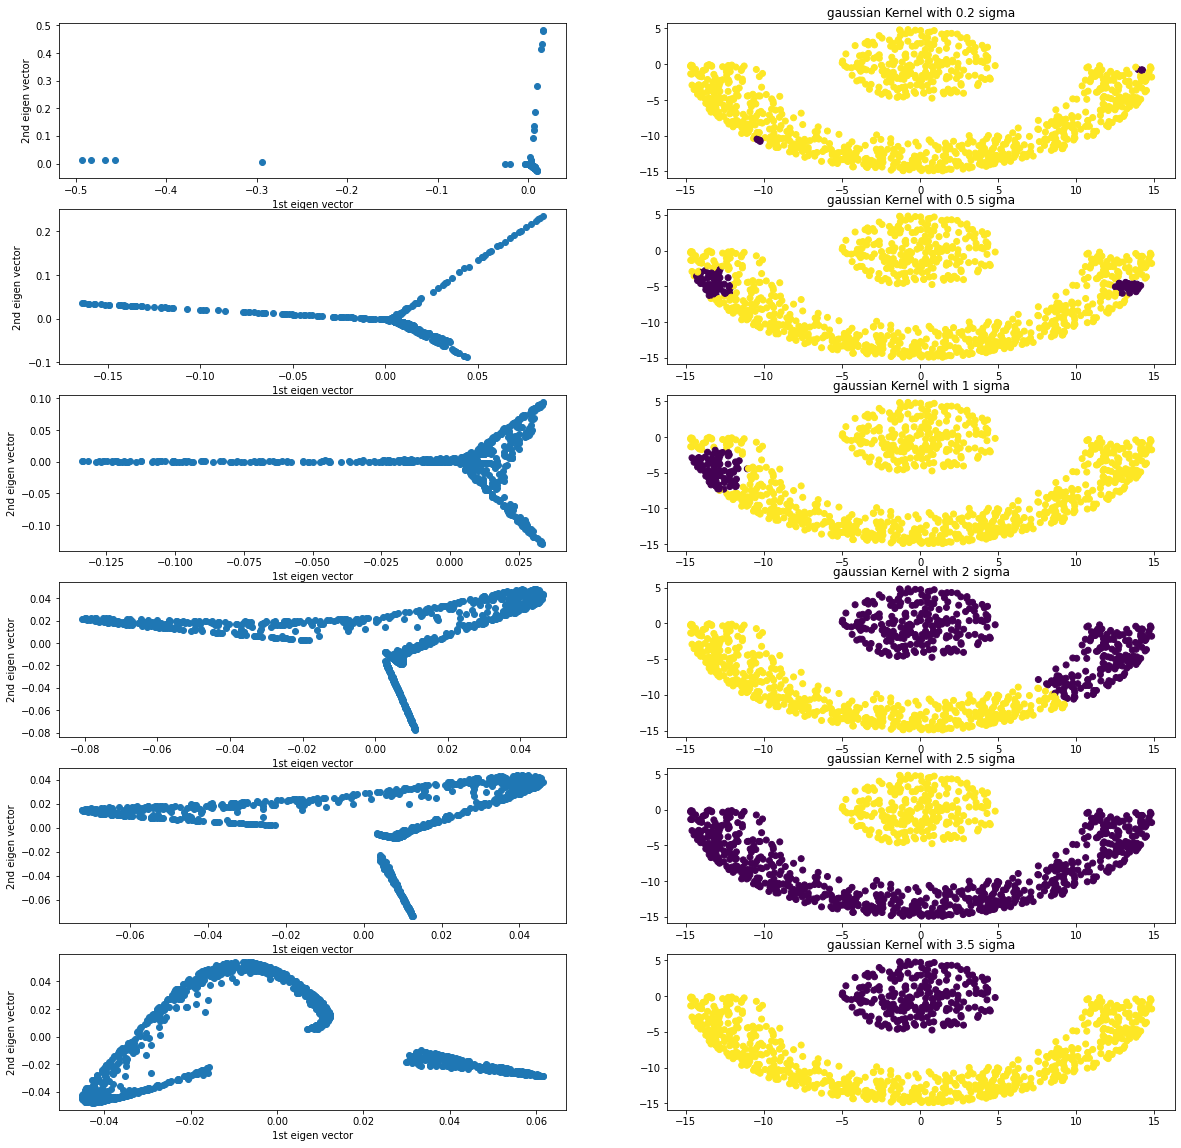

In [ ]:
k=2
sigma=[.2,.5,1,2,2.5,3.5]
fig,axs=plt.subplots(6,2,figsize=(20,20))
j=0
for i in range(len(sigma)):
    K=gaussiankernel(data.T,sigma[i])
    K=centering(K)
    eigval,eigvec=np.linalg.eigh(K)
    indx=np.argsort(eigval)
    indx=indx[::-1]
    eigval=eigval[indx]
    eigvec=eigvec[:,indx]
    H=eigvec[:,0:2]
    axs[j,0].scatter(H[:,0],H[:,1])
    axs[j,0].set_xlabel('1st eigen vector')
    axs[j,0].set_ylabel('2nd eigen vector')
    cluster,centroid,loss=kmeans(H,k)
    axs[j,1].scatter(data[:,0],data[:,1],c=cluster)
    axs[j,1].set_title(f'gaussian Kernel with {sigma[i]} sigma')
    j=j+1

we see that the data set is perfectly seperated with sigma=3.5 and 2.5
one thing to note that when we run this several times it gives different results as each time the random initialisations are different

defining the polynomial kernel

In [ ]:
def poly_kernel(X,d):
    X=np.array(X)
    kernel=(1+X.T@X)**d
    return kernel

clustering with different polynomial degrees

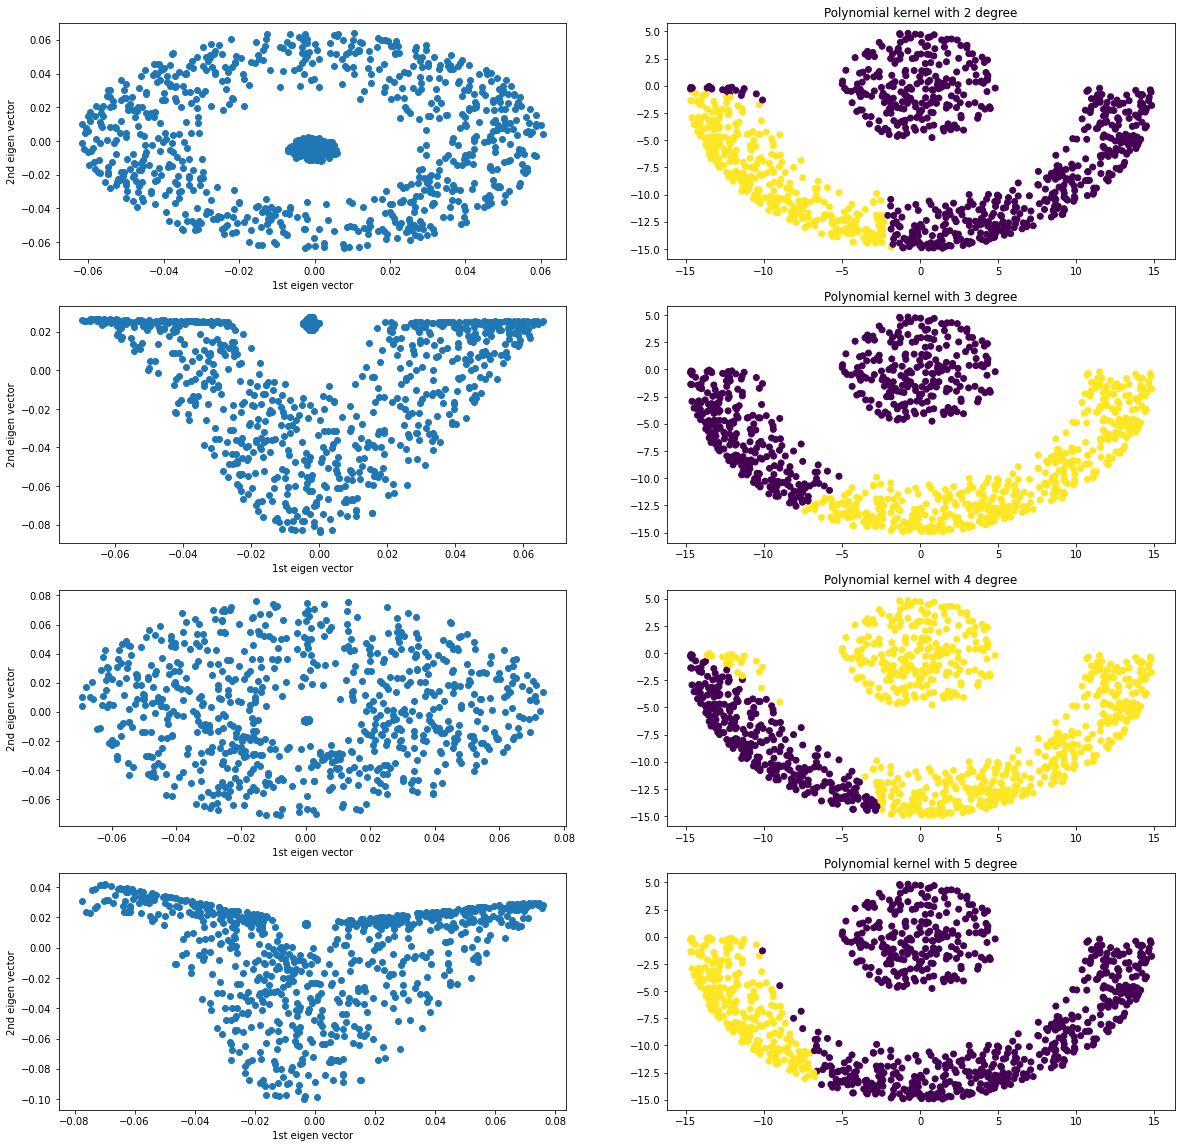

In [ ]:
k=2
degree=[2,3,4,5]
fig,axs=plt.subplots(4,2,figsize=(20,20))
j=0
for i in range(len(degree)):
    K=poly_kernel(data.T,degree[i])
    K=centering(K)
    eigval,eigvec=np.linalg.eigh(K)
    indx=np.argsort(eigval)
    indx=indx[::-1]
    eigval=eigval[indx]
    eigvec=eigvec[:,indx]
    H=eigvec[:,0:2]
    axs[j,0].scatter(H[:,0],H[:,1])
    axs[j,0].set_xlabel('1st eigen vector')
    axs[j,0].set_ylabel('2nd eigen vector')
    cluster,centroid,loss=kmeans(H,k)
    axs[j,1].scatter(data[:,0],data[:,1],c=cluster)
    axs[j,1].set_title(f'Polynomial kernel with {degree[i]} degree')
    j=j+1

we see that none of the kernels can seperate the data completely.so it is not working with this particular dataset

kmeans with the method as mentioned in question2.4

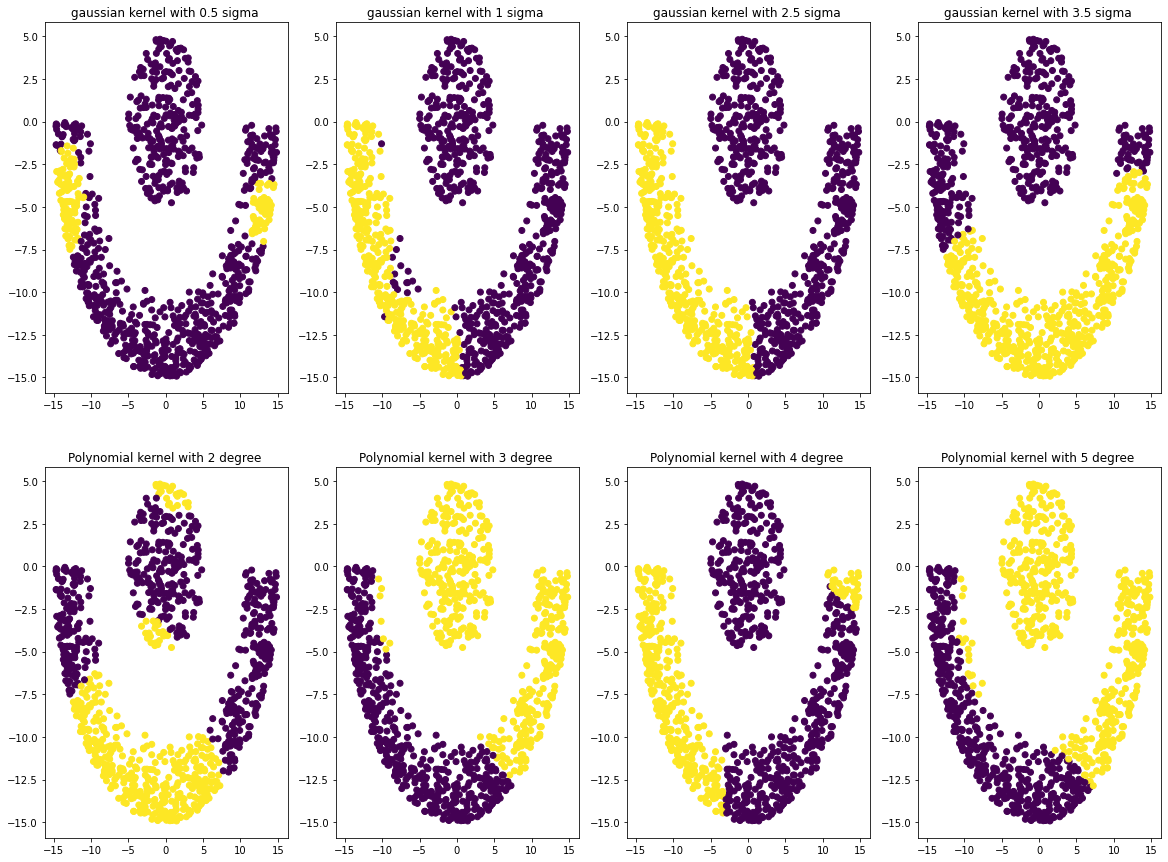

In [ ]:
degree=[2,3,4,5]
sigma=[.5,1,2.5,3.5]
fig,axs=plt.subplots(2,4,figsize=(20,15))
j=0
for i,ax in enumerate(axs.flatten()):
    if i<4:
        K=gaussiankernel(data.T,sigma[i])
        K=centering(K)
        eigval,eigvec=np.linalg.eigh(K)
        indx=np.argsort(eigval)
        indx=indx[::-1]
        eigval=eigval[indx]
        eigvec=eigvec[:,indx]
        H=eigvec[:,0:2]
        cluster=np.argmax(H,axis=1)
        ax.scatter(data[:,0],data[:,1],c=cluster)
        ax.set_title(f'gaussian kernel with {sigma[i]} sigma ')
    else:
        K=poly_kernel(data.T,degree[j])
        K=centering(K)
        eigval,eigvec=np.linalg.eigh(K)
        indx=np.argsort(eigval)
        indx=indx[::-1]
        eigval=eigval[indx]
        eigvec=eigvec[:,indx]
        H=eigvec[:,0:2]
        cluster=np.argmax(H,axis=1)
        ax.scatter(data[:,0],data[:,1],c=cluster)
        ax.set_title(f'Polynomial kernel with {degree[j]} degree ')
        j=j+1

we can see none of the methods can completely seperate the data